In [1]:
# importing libraries
import os
import shutil
import natsort
import cv2

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from PIL import Image
from tqdm import tqdm
from re import search

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, MaxPooling2D, Flatten, Activation, Conv2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping 

## data Preprocessing

In [3]:
train_DIR = '/home/vaibhav/Documents/apple_leave/data_prepare/train'

In [4]:
categories = ['healthy','multiple_diseases','rust','scab']

In [7]:
for j in categories:
    path = os.path.join(train_DIR,j)
    for img in tqdm(os.listdir(path)):
        img_array=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        img_size = 224
        new_image= cv2.resize(img_array,(img_size,img_size))
        break
    break
        

  0%|          | 0/516 [00:00<?, ?it/s]


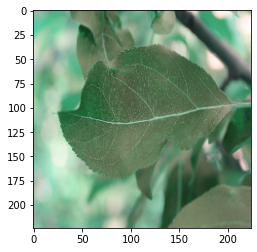

In [8]:
# ---example ----------------
img_size = 224
new_image= cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_image)

## model generation


In [14]:
datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  validation_split=0.2)

# ------------------------------------------------------validation_split=0.2
img_size = 224
train_datagen = datagen.flow_from_directory(train_DIR,
                                           target_size=(img_size,img_size),
                                           batch_size=16,
                                           class_mode='categorical',
                                           subset='training')

val_datagen = datagen.flow_from_directory(train_DIR,
                                           target_size=(img_size,img_size),
                                           batch_size=16,
                                           class_mode='categorical',
                                           subset='validation')

Found 1397 images belonging to 4 classes.
Found 348 images belonging to 4 classes.


In [16]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(img_size,img_size,3)))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(4,activation='softmax'))



In [17]:
# Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)      